In [174]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

In [175]:
data = pd.read_csv(r"C:\Users\91733\Downloads\Project Loan\loan_approval_dataset.csv")


In [176]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [177]:
print(data.shape)


(4269, 13)


In [178]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [179]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [180]:
data.columns = data.columns.str.strip()

In [181]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [182]:
data.rename(columns={'cibil_score': 'credit_history'}, inplace=True)


In [183]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'credit_history',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [184]:
data.head(20)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_history,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [185]:
unwanted = ['loan_id', 'no_of_dependents','self_employed','loan_amount', 'loan_term',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

In [186]:
data = data.drop(columns = unwanted)


In [187]:
data.shape

(4269, 4)

In [188]:
data.head()

,education,income_annum,credit_history,loan_status
0,Graduate,9600000,778,Approved
1,Not Graduate,4100000,417,Rejected
2,Graduate,9100000,506,Rejected
3,Graduate,8200000,467,Rejected
4,Not Graduate,9800000,382,Rejected


In [189]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])
data['education'] = label_encoder.fit_transform(data['education'])


In [190]:
data.head()

,education,income_annum,credit_history,loan_status
0,0,9600000,778,0
1,1,4100000,417,1
2,0,9100000,506,1
3,0,8200000,467,1
4,1,9800000,382,1


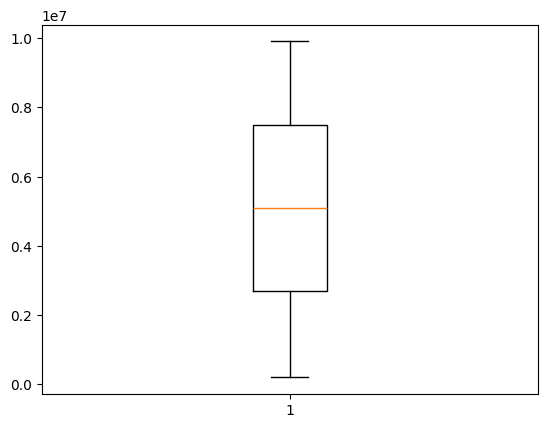

In [191]:
plt.boxplot(data['income_annum'])
plt.show()

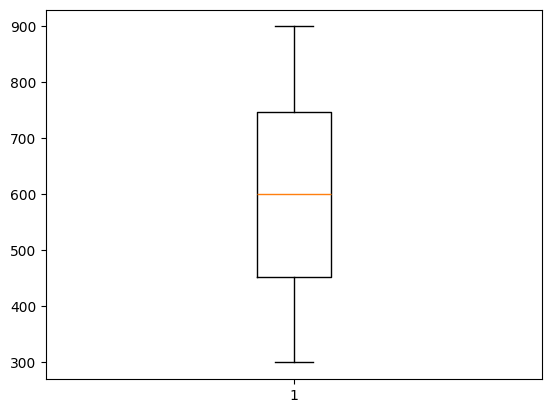

In [192]:
plt.boxplot(data['credit_history'])
plt.show()

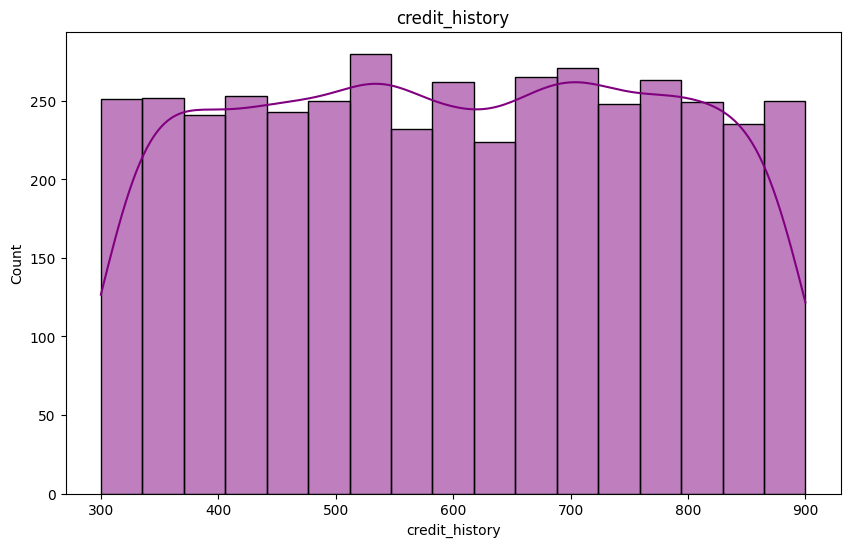

In [193]:
plt.figure(figsize=(10,6))
sns.histplot(data['credit_history'],kde=True,color='purple')
plt.title('credit_history')
plt.show()

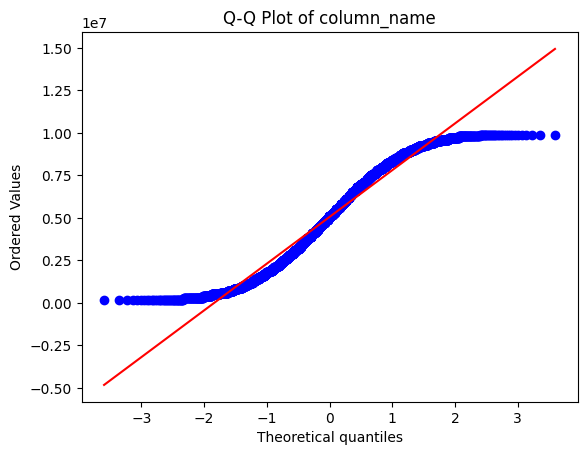

In [194]:
import scipy.stats as stats

stats.probplot(data['income_annum'],dist="norm", plot=plt)
plt.title('Q-Q Plot of column_name')
plt.show()

In [195]:
data.head()


,education,income_annum,credit_history,loan_status
0,0,9600000,778,0
1,1,4100000,417,1
2,0,9100000,506,1
3,0,8200000,467,1
4,1,9800000,382,1


In [196]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data_standard = data.copy()
data_standard['income_annum'] = scaler.fit_transform(data[['income_annum']])
data_standard.head()


,education,income_annum,credit_history,loan_status
0,0,1.617979,778,0
1,1,-0.341750,417,1
2,0,1.439822,506,1
3,0,1.119139,467,1
4,1,1.689242,382,1


In [197]:
data_standard['credit_history'] = scaler.fit_transform(data[['credit_history']])
data_standard.head()

,education,income_annum,credit_history,loan_status
0,0,1.617979,1.032792,0
1,1,-0.341750,-1.061051,1
2,0,1.439822,-0.544840,1
3,0,1.119139,-0.771045,1
4,1,1.689242,-1.264055,1


In [198]:
data = data_standard
data.head()

,education,income_annum,credit_history,loan_status
0,0,1.617979,1.032792,0
1,1,-0.341750,-1.061051,1
2,0,1.439822,-0.544840,1
3,0,1.119139,-0.771045,1
4,1,1.689242,-1.264055,1


In [199]:
x = data[['education', 'income_annum', 'credit_history']]
y = data['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold

In [201]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# To store accuracies
logistic_accuracies = []
random_forest_accuracies = []
decision_tree_accuracies = []

# Logistic Regression
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logistic_accuracies.append(accuracy)

# Random Forest
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    random_forest_accuracies.append(accuracy)

# Decision Tree
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    decision_tree_model.fit(X_train, y_train)
    y_pred = decision_tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    decision_tree_accuracies.append(accuracy)

# Print results
print(f'Logistic Regression Accuracies: {logistic_accuracies}')
print(f'Average Logistic Regression Accuracy: {sum(logistic_accuracies) / len(logistic_accuracies):.4f}')

print(f'Random Forest Accuracies: {random_forest_accuracies}')
print(f'Average Random Forest Accuracy: {sum(random_forest_accuracies) / len(random_forest_accuracies):.4f}')

print(f'Decision Tree Accuracies: {decision_tree_accuracies}')
print(f'Average Decision Tree Accuracy: {sum(decision_tree_accuracies) / len(decision_tree_accuracies):.4f}')


Logistic Regression Accuracies: [0.9297423887587822, 0.914519906323185, 0.9180327868852459, 0.9110070257611241, 0.9202813599062134]
Average Logistic Regression Accuracy: 0.9187
Random Forest Accuracies: [0.9484777517564403, 0.9414519906323185, 0.9449648711943794, 0.9426229508196722, 0.9460726846424384]
Average Random Forest Accuracy: 0.9447
Decision Tree Accuracies: [0.9180327868852459, 0.9168618266978923, 0.9215456674473068, 0.8992974238875878, 0.9144196951934349]
Average Decision Tree Accuracy: 0.9140


In [203]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9203
Log Loss: 0.2123
Confusion Matrix:
[[507  30]
 [ 38 278]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       537
           1       0.90      0.88      0.89       316

    accuracy                           0.92       853
   macro avg       0.92      0.91      0.91       853
weighted avg       0.92      0.92      0.92       853



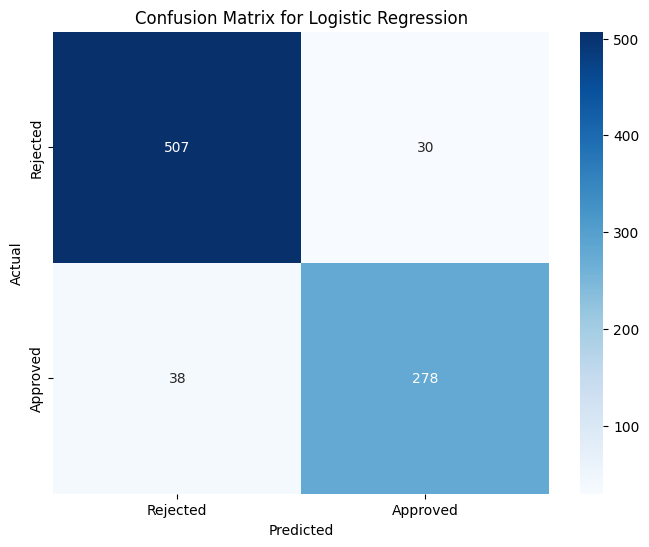

In [208]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {log_loss_value:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

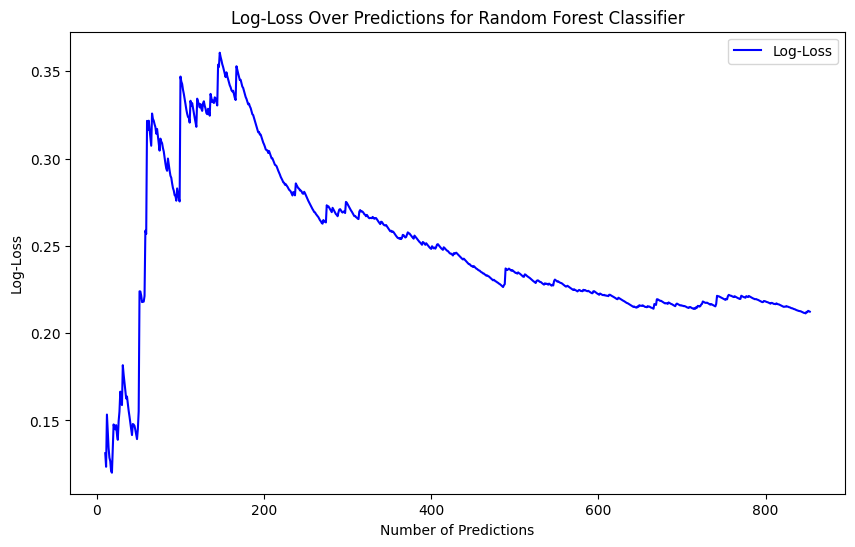

Final Log-Loss: 0.2123


In [211]:
y_prob = model.predict_proba(X_test)[:, 1]  

iterations = np.arange(10, len(y_test) + 1)
losses = []

for i in iterations:
    if len(np.unique(y_test[:i])) > 1:  # Ensure there are at least 2 classes in the subset
        loss = log_loss(y_test[:i], y_prob[:i])
        losses.append(loss)

# Plotting the Log-Loss
plt.figure(figsize=(10, 6))
plt.plot(iterations, losses, label='Log-Loss', color='blue')
plt.title('Log-Loss Over Predictions for Random Forest Classifier')
plt.xlabel('Number of Predictions')
plt.ylabel('Log-Loss')
plt.legend()
plt.show()

final_loss = log_loss(y_test, y_prob)
print(f"Final Log-Loss: {final_loss:.4f}")